In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
x = housing.data
y = housing.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 30)
print(f"Training data: {x_train.shape}")
print(f"Testing data: {x_test.shape}")

(20640, 8) (20640,)
Training data: (14448, 8)
Testing data: (6192, 8)


In [ ]:
scaling = StandardScaler()
x_train_scaled = scaling.fit_transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)


LinearRegression()

In [ ]:
prediction = model.predict(x_test_scaled)

print(f"w is: {model.coef_}")
print(f"b is: {model.intercept_}")

w is: [ 0.83407896  0.12058842 -0.27954285  0.31628217 -0.00641163 -0.04496431
 -0.87862273 -0.84795067]
b is: 2.0591387451550056


In [ ]:
mse = mean_squared_error(y_test, prediction)
print(f"MSE on test set: {mse:.4f}")

MSE on test set: 0.5661


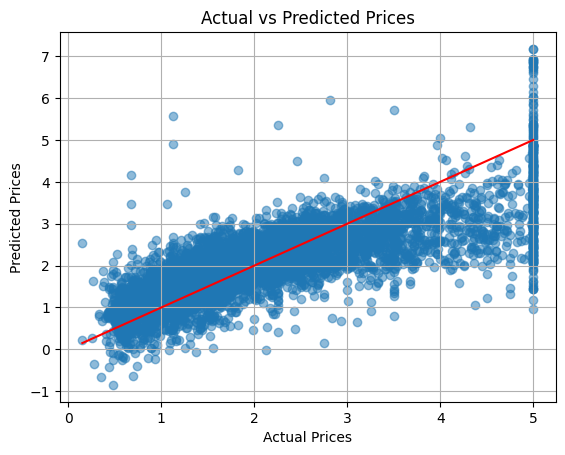

In [ ]:
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # ideal line
plt.grid(True)
plt.show()

In [ ]:
print(f"data: {housing.data[0]}")
print(housing.feature_names)

data: [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
joblib.dump(model, "california_housing_model.pkl")
joblib.dump(scaling, "scaler.pkl")

['scaler.pkl']

In [ ]:
model = joblib.load('california_housing_model.pkl')
scaler = joblib.load('scaler.pkl')

In [ ]:
def predict_house_price(new_data):
    """
    Predict the house price based on the provided features.

    Parameters:
    new_data (list): A list of features for the house.

    Returns:
    float: The predicted house price.
    """
    new_data = np.array([float(x) for x in new_data])
    new_data_scaled = scaler.transform([new_data])
    predicted_new_data = model.predict(new_data_scaled)
    return predicted_new_data[0]

new_data = input("Enter the features of the house separated by commas: ")
new_data_list = new_data.split(",")
predicted_price = predict_house_price(new_data_list)
print(f"Predicted house price: ${predicted_price:.2f}")


Enter the features of the house separated by commas: 4.12,20.0,5.5,1.2,1500.0,3.0,34.21,-118.45
Predicted house price: $2.26
